Simulation 1 has finished after 733.9784676150852 days, requiring 98 iterations and 0.004230699967592955 secs of compute time
Simulation 2 has finished after 736.4035727137586 days, requiring 110 iterations and 0.005613100016489625 secs of compute time
Simulation 3 has finished after 734.7098459898693 days, requiring 110 iterations and 0.005384700023569167 secs of compute time
Simulation 4 has finished after 754.3296805496559 days, requiring 116 iterations and 0.004703499958850443 secs of compute time


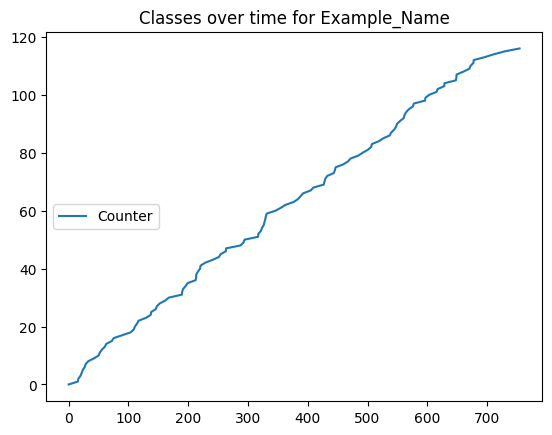

In [15]:
import datetime

import pyRBM.Core.Model as Model
import pyRBM.Build.Compartment as Compartments
import pyRBM.Build.RuleTemplates as BasicRules
import pyRBM.Simulation.Solvers as Solvers
from pyRBM.Build.Utils import createArgsDict

model_classes = [["Counter", "units"]]

class ExampleCompartment(Compartments.Compartment):
    def __init__(self, name:str):
        # Sets lat/long and creates and empty set of compartment labels.

        super().__init__(name, comp_type="Comp")
        # Crops exist in three stages in this simplified model: planted, growing and harvested.
        class_labels = [class_entry[0] for class_entry in model_classes]
        self.addClassLabels(class_labels)
        
        self.setInitialConditions({"Counter":0})


def exampleRules(args):
    default_args = {"count_propensity":0.14}
    parsed_args = createArgsDict(default_args,args)
    count_rule = BasicRules.ExitEntranceRule("Comp", "Counter", 1, f"{parsed_args['count_propensity']}", "Counter", "counting")
    return  (count_rule)

def exampleCompartments(args):
    single_comp = ExampleCompartment("Example_Name")
    return single_comp

model = Model.Model("Basic Epi Model")
model.buildModel(model_classes, exampleRules, exampleCompartments, rule_constants={"count_propensity":0})
model_solver = Solvers.GillespieSolver(debug=False)
model.initializeSolver(model_solver)

start_date = datetime.datetime(2001, 1, 1)
for x in range(4):
    model.simulate(start_date, 365*2, 10000)

model.trajectory.plotAllClassesOverTime(0)